<a href="https://colab.research.google.com/github/data2450/ML-support-vector-machine/blob/main/svm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

In [4]:
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # we will only focus on Iris-setosa and Iris-Versicolor
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


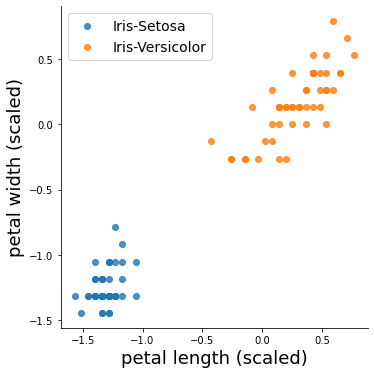

In [5]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [6]:
svc = LinearSVC(C=1,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [7]:
# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

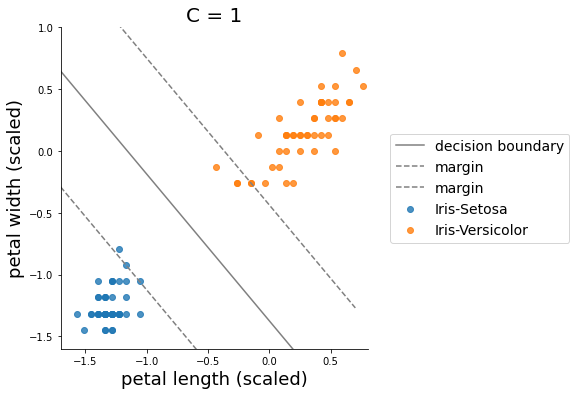

In [8]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [9]:
svc = LinearSVC(C=1000,loss="hinge") # let's change C to a much larger value
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

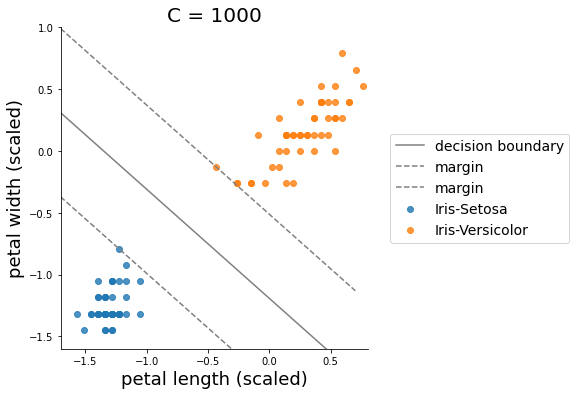

In [10]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1000', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

As you can see, large C leads to heavy penalization of margin violations.**When C=1000, data points tend not to cross the margin and stay "off the street", whereas when C=1, a few data points have crossed the margin.**

# Non-linear SVM
SVM, at its original form, can only classify linearly separable variables. Yet it can be easily adapted to conduct complex nonlinear classifications by adding non-linear features. Here we will introduce two types of non-linear features: polynomial features, and similarity features.

# Polynomial features
Given a feature vector  [x1,x2,...,xn]  (bias not included), we can transform it to polynomial features, just like what we did in linear regression and logistic regression. For example, a 2nd degree polynomial transformation of  [x1,x2,x3]  through PolynomialFeatures(degree = 2, include_bias=False) will be  [x1,x2,x21,x22,x23,x1x2,x1x3,x2x3] . A SVM classifier can be trained on these new features. Instead of  w1x1+w2x2+w3x3+b , we will have  w1x1+w2x2+w3x21+w4x22+w5x23+w6x1x2+w7x1x3+w8x2x3+b . Let's look at the following example:

In [11]:
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


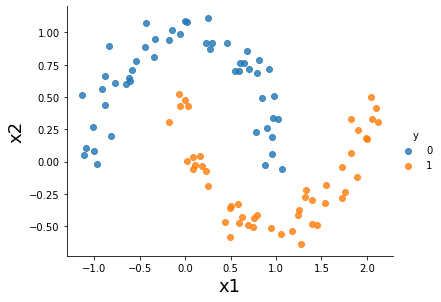

In [12]:
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

In [13]:
# tranform the features, here we use a 3rd degree polynomials
print('Shape of X before tranformation:', X.shape)
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xpoly = poly.fit_transform(X)
print('Shape of X aftere tranformation:', Xpoly.shape)
#after polynomialfeature appling the dimension is adjusted to 9

Shape of X before tranformation: (100, 2)
Shape of X aftere tranformation: (100, 9)


In [14]:
# standardize the data
scaler = StandardScaler()
Xpolystan = scaler.fit_transform(Xpoly)

In [15]:
svm_clf = LinearSVC(C=10,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)
print(svm_clf.intercept_, svm_clf.coef_)

[0.14736936] [[-1.48196354 -0.38934438 -3.63172881 -0.2440377   0.84161855  6.20762803
  -0.98199262  0.70830613 -1.94867953]]


In [16]:
# preparing to plot decision boundary of the classifier
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [17]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# polynomial transformation and standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridpoly = poly.transform(xgrid)
xgridpolystan = scaler.transform(xgridpoly)
# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


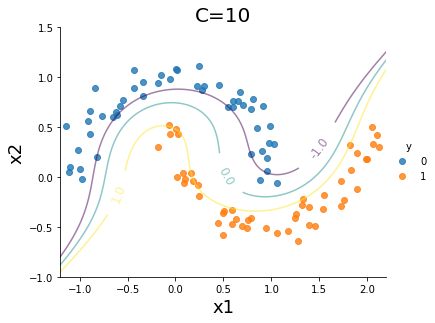

In [18]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.5,0.3),(0.5,0.0),(-0.5,-0.2)])
#
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

Overall, the classification seems to learn pretty well. There are some margin violations - some orange dots have gone pass the  w Tx (i)+b=1  margin, and some blue dots have gone pass the  w Tx (i)+b=−1  margin. But no point is on the wrong side of the decision boundary ( w Tx (i)+b=0 ).

Let's also try training SVM with a larger C:  C=1000 :

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


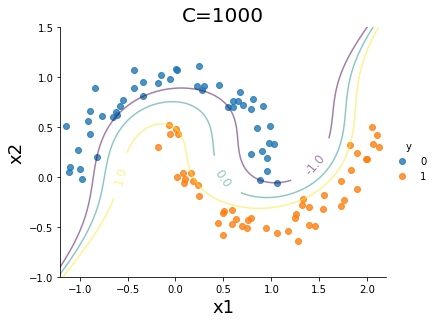

In [19]:
svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)

# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.5,0.1),(0.5,0.0),(-0.5,0.0)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

Now, we have no margin violations since the penalty is 100 times higher than the  C=10  case.
When the degree of the polynomials is high, the above model can become really slow. Fortunately, there exists a mathematical technique called "kernel trick" that avoids the explicit mapping needed to get linear learning algorithms to learn a nonlinear function or decision boundary. The mathematical details of the kernel trick is beyond the scope of this tutorial. If you are interested, you can read this Quora post. I read the kernel trick from the book "Hands-on Machine Learning with Scikit-Learn & TensorFlow" Chapter 5. If you have the book, you can read the book instead.
The kernel trick is implemented by the SVC class in Scikit-Learn. Let's run the SVC on the same dataset:

In [20]:
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


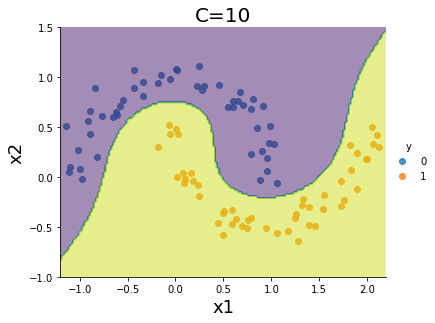

In [21]:
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=3, C=10, coef0=1)
svm_clf.fit(Xstan,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

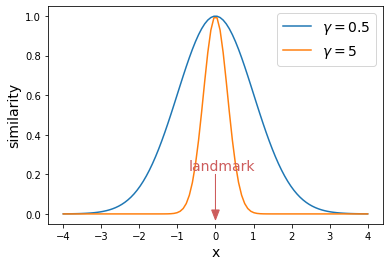

In [22]:
x = np.linspace(-4,4,num=100)
l = 0
gamma1=0.5
f1 = np.exp(-gamma1*(x-l)*(x-l))
gamma2=5
f2 = np.exp(-gamma2*(x-l)*(x-l))
plt.plot(x,f1,label=r'$\gamma = 0.5$')
plt.plot(x,f2,label=r'$\gamma = 5$')
plt.legend(fontsize = 14)
plt.xlabel('x',fontsize = 14)
plt.ylabel('similarity', fontsize = 14)
plt.arrow(0,0.2,0,-0.18, head_width=0.2, head_length=0.05,lw=1,color='indianred')
plt.text(-0.7,0.22,'landmark', color='indianred', fontsize=14)
plt.show()

In [23]:
# generate dataset
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()


,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


In [24]:
# standardize the data so that x1, x2 have similar scale. 
# Otherwise, if x2>>x1, x2 will dominate the change in similarity.
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [25]:
from sklearn.metrics.pairwise import rbf_kernel

In [26]:
# compute similarity features. F.shape should be (100,100)
F = rbf_kernel(Xstan, gamma = 0.5)

svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(F,y)


LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [27]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1,h=0.1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)
f = rbf_kernel(xgridstan, Xstan, gamma = 0.5)
# prediction
Z = f.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wf + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


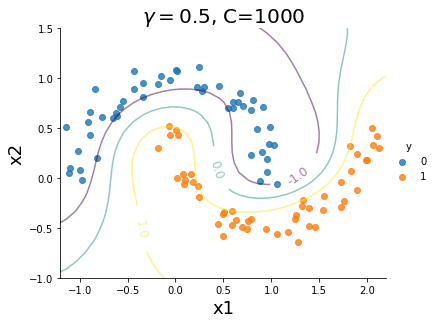

In [28]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.3,0),(0.5,0.1),(-0.3,-0.5)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=0.5$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


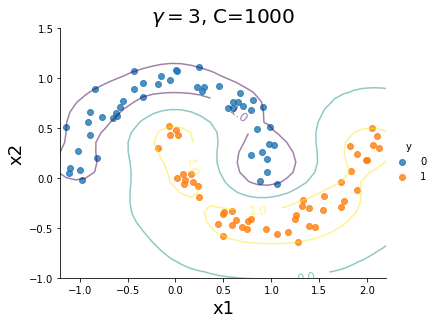

In [29]:
# compute similarity features. F.shape should be (100,100)
F = rbf_kernel(Xstan, gamma = 3)

svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(F,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1,h=0.1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)
f = rbf_kernel(xgridstan, Xstan, gamma = 3)
# prediction
Z = f.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wf + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=3$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

As you can see, a larger  γ  leads to a more irregular decision boundary (cyan curve), and more irregular margins (purple and yellow curves). This is because larger  γ  means smaller range of influence of each landmark. Such localization leads to less smooth boundaries. If  γ  is too large, the model will overfit to each landmark and you will need to decrease  γ  to regularize the model a bit.
Let's also plot  γ=3,C=0.05 , just to see what it looks like:

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


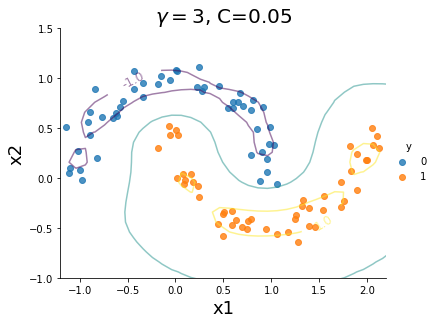

In [30]:
# compute similarity features. F.shape should be (100,100)
F = rbf_kernel(Xstan, gamma = 3)

svm_clf = LinearSVC(C=0.05,loss='hinge',max_iter=10000)
svm_clf.fit(F,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1,h=0.1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)
f = rbf_kernel(xgridstan, Xstan, gamma = 3)
# prediction
Z = f.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wf + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=3$, C=0.05', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

There are more margin violations, which is expected.
We can also use SVC with RBF kernel to do the same classification. Here is how:

In [31]:
svm_clf = SVC(kernel='rbf', gamma = 3, C=1000)
svm_clf.fit(Xstan,y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


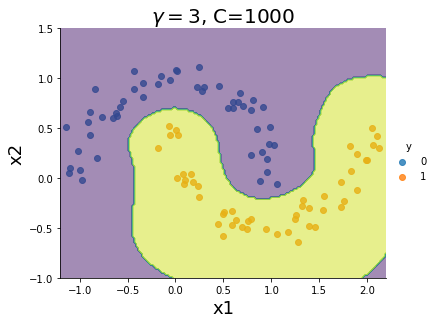

In [32]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=3$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


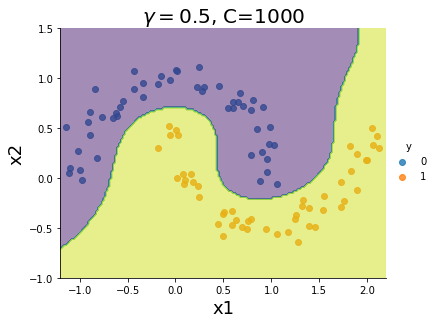

In [33]:
svm_clf = SVC(kernel='rbf', gamma = 0.5, C=1000)
svm_clf.fit(Xstan,y)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=0.5$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

# Other applications of SVM
Aside from classification, the SVM algorithm is also capabale of regression and outlier detection. SVM regression aims to fit as many datapoints as possible between the margins while limiting margin violations (datapoints off the "street"). Related Scikit-Learn functions are: SVR, and linearSVR. SVM outlier detection detects a soft boundary on input data X and predict inliers (class 1) and outliers (class -1) on the same data. Related Scikit-Learn function is OneClassSVM. I will not go into details of these applications, but feel free to learn more about them yourself!